---
---

# **1 -  Data Set**

**Data**

We will work with the classic Iris Data Set. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

Full Details: https://en.wikipedia.org/wiki/Iris_flower_data_set

Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Read Data Set

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Dataset/Iris/Dataset_Iris.csv', sep=';')

Print 5 baris pertama

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,4.3,3.0,1.1,0.1,Iris-setosa
1,7,4.4,3.0,1.3,0.2,Iris-setosa
2,8,4.4,3.2,1.3,0.2,Iris-setosa
3,11,4.4,NaN,1.4,0.2,Iris-setosa
4,30,4.5,2.3,1.3,0.3,Iris-setosa


Cek Ukuran Data Set

In [4]:
df.shape

(135, 6)

Drop Id column

In [5]:
df = df.drop('Id', axis=1)

Info Data Set

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  130 non-null    float64
 1   SepalWidthCm   132 non-null    float64
 2   PetalLengthCm  133 non-null    float64
 3   PetalWidthCm   132 non-null    float64
 4   Species        135 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.4+ KB


Copy Dataset

In [7]:
df_copy = df.copy()

---
---

# **2 - Exploratory Data Analysis and Feature Engineering**

## **A. Dealing with Outliers**

In [8]:
# Histogram (Feature distribution)
'''
fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=75)

col = 0
for i in range(2): # row of graphic
  for j in range(2): # column of graphic
    sns.histplot(x=df_copy.drop('Species',axis=1).columns[col], data=df_copy, ax=axes[i, j], kde=True, hue='Species')
    plt.tight_layout()
    col +=1;
'''
pass

Cek Outlier dengan boxplot

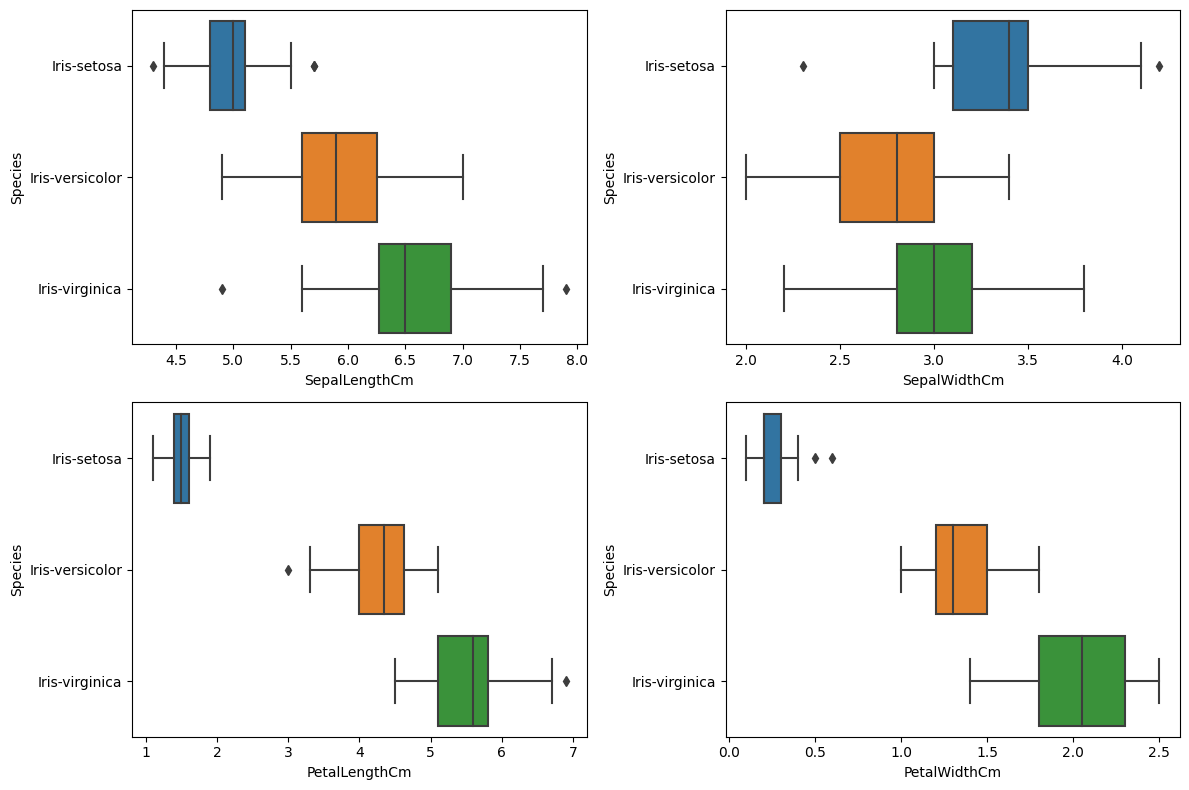

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12,8), dpi=100)

col = 0
for i in range(2): # row of graphic
  for j in range(2): # column of graphic
    sns.boxplot(x=df_copy.drop('Species',axis=1).columns[col], y='Species', data=df_copy, ax=axes[i, j])
    plt.tight_layout()
    col +=1;

**Sepal Length of Iris Virginica**

In [10]:
# Calculate percentile ignoring nan value
q1, q3 = np.nanpercentile(df_copy[(df_copy['Species'] == 'Iris-virginica')]['SepalLengthCm'], [25,75])
print(q1, q3)

6.2749999999999995 6.9


In [11]:
lower_limit = q1 - 1.5*(q3-q1)
lower_limit

5.337499999999999

In [12]:
drop_row = (df_copy[(df_copy['Species'] == 'Iris-virginica') & 
                    (df_copy['SepalLengthCm']<lower_limit)])
drop_row

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
20,4.9,2.5,4.5,1.7,Iris-virginica


**Sepal Width of Iris Setosa**

In [13]:
df_copy = df_copy.drop(drop_row.index, axis=0)

In [14]:
q1, q3 = np.nanpercentile(df_copy[(df_copy['Species'] == 'Iris-setosa')]['SepalWidthCm'], [25,75])
lower_limit = q1 - 1.5*(q3-q1)
lower_limit

2.5

In [15]:
upper_limit = q3 + 1.5*(q3-q1)
upper_limit

4.1

In [16]:
drop_row = (df_copy[(df_copy['Species'] == 'Iris-setosa') & 
                    (df_copy['SepalWidthCm'] < lower_limit) | 
                    (df_copy['SepalWidthCm'] > upper_limit)])
drop_row

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,4.5,2.3,1.3,0.3,Iris-setosa
48,NaN,4.2,1.4,0.2,Iris-setosa


In [17]:
df_copy = df_copy.drop(drop_row.index, axis=0)

**Petal Width of Iris Virginica**

In [18]:
q1, q3 = np.nanpercentile(df_copy[(df_copy['Species'] == 'Iris-setosa')]['PetalWidthCm'], [25,75])
upper_limit = q3 + 1.5*(q3-q1)
upper_limit

0.44999999999999996

In [19]:
drop_row = (df_copy[(df_copy['Species'] == 'Iris-setosa') & 
                    (df_copy['PetalWidthCm']>upper_limit+0.06)])
drop_row

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
27,5.0,3.5,1.6,0.6,Iris-setosa


In [20]:
df_copy = df_copy.drop(drop_row.index, axis=0)

---

## **B. Dealing with Missing Value**

Cek Missing Value

In [21]:
df_copy.isnull().sum()

SepalLengthCm    4
SepalWidthCm     3
PetalLengthCm    2
PetalWidthCm     3
Species          0
dtype: int64

Cek Descriptive Statistics

In [22]:
df_copy.groupby('Species').describe().transpose()

Species              Iris-setosa  Iris-versicolor  Iris-virginica
SepalLengthCm count    41.000000        43.000000       43.000000
              mean      4.985366         5.930233        6.632558
              std       0.335083         0.510618        0.604239
              min       4.300000         4.900000        5.600000
              25%       4.800000         5.600000        6.300000
              50%       5.000000         5.900000        6.500000
              75%       5.100000         6.250000        6.900000
              max       5.700000         7.000000        7.900000
SepalWidthCm  count    39.000000        45.000000       44.000000
              mean      3.382051         2.766667        3.000000
              std       0.298127         0.316946        0.323498
              min       3.000000         2.000000        2.200000
              25%       3.100000         2.500000        2.800000
              50%       3.400000         2.800000        3.000000
              75%       3.500000         3.000000        3.200000
              max       4.100000         3.400000        3.800000
PetalLengthCm count    41.000000        44.000000       44.000000
              mean      1.490244         4.279545        5.588636
              std       0.160942         0.484926        0.526602
              min       1.100000         3.000000        4.800000
              25%       1.400000         4.000000        5.100000
              50%       1.500000         4.350000        5.600000
              75%       1.600000         4.625000        5.825000
              max       1.900000         5.100000        6.900000
PetalWidthCm  count    41.000000        44.000000       43.000000
              mean      0.239024         1.329545        2.053488
              std       0.102172         0.204120        0.262178
              min       0.100000         1.000000        1.400000
              25%       0.200000         1.200000        1.850000
              50%       0.200000         1.300000        2.100000
              75%       0.300000         1.500000        2.300000
              max       0.500000         1.800000        2.500000

### **a. Sepal Length**

Karena **Sepal Length**, **Sepal Width** dan **Petal Width** memiliki **mean** dan **median** yang hampir **sama**, maka fill missing value dengan **mean** dari masing-masing feature tiap spesies.


**Setosa**

In [23]:
df_copy[(df_copy['SepalLengthCm'].isnull()) & (df_copy['Species'] == 'Iris-setosa')]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,NaN,3.0,1.4,0.3,Iris-setosa


In [24]:
sepal_len_setosa_mean = df_copy[df_copy['Species'] == 'Iris-setosa']['SepalLengthCm'].mean()
sepal_len_setosa_mean

4.985365853658536

In [25]:
df_copy.loc[[14], 'SepalLengthCm'] = df_copy.loc[[14],'SepalLengthCm'].fillna(sepal_len_setosa_mean)

**Versicolor**

In [26]:
df_copy[(df_copy['SepalLengthCm'].isnull()) & (df_copy['Species'] == 'Iris-versicolor')]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
66,NaN,2.7,3.9,1.2,Iris-versicolor
97,NaN,2.9,4.3,1.3,Iris-versicolor


In [27]:
sepal_len_versicolor_mean = df_copy[df_copy['Species'] == 'Iris-versicolor']['SepalLengthCm'].mean()
sepal_len_versicolor_mean

5.930232558139535

In [28]:
df_copy.loc[[66,97],'SepalLengthCm'] = df_copy.loc[[66,97],['SepalLengthCm']].fillna(sepal_len_versicolor_mean)

**Virginica**

In [29]:
df_copy[(df_copy['SepalLengthCm'].isnull()) & (df_copy['Species'] == 'Iris-virginica')]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
79,NaN,2.2,5.0,1.5,Iris-virginica


In [30]:
sepal_len_virginica_mean = df_copy[df_copy['Species'] == 'Iris-virginica']['SepalLengthCm'].mean()
sepal_len_virginica_mean

6.632558139534882

In [31]:
df_copy.loc[[79],'SepalLengthCm'] = df_copy.loc[[79],'SepalLengthCm'].fillna(sepal_len_virginica_mean)

---

### **b. Sepal Width**

**Setosa**

In [32]:
df_copy[(df_copy['SepalWidthCm'].isnull()) & (df_copy['Species'] == 'Iris-setosa')]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
3,4.4,NaN,1.4,0.2,Iris-setosa
25,5.0,NaN,1.3,0.3,Iris-setosa
59,5.7,NaN,1.5,0.4,Iris-setosa


In [33]:
sepal_wid_setosa_mean = df_copy[df_copy['Species'] == 'Iris-setosa']['SepalWidthCm'].mean()
sepal_wid_setosa_mean

3.382051282051283

In [34]:
df_copy.loc[[3,25,59],'SepalWidthCm'] = df_copy.loc[[3,25,59],'SepalWidthCm'].fillna(sepal_wid_setosa_mean)

---

### **c. Petal Length**

**Setosa**

In [35]:
df_copy[(df_copy['PetalLengthCm'].isnull()) & (df_copy['Species'] == 'Iris-setosa')]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,5.2,3.4,NaN,0.2,Iris-setosa


In [36]:
petal_len_setosa_mean = df_copy[df_copy['Species'] == 'Iris-setosa']['PetalLengthCm'].mean()
petal_len_setosa_mean

1.4902439024390244

In [37]:
df_copy.loc[[40],'PetalLengthCm'] = df_copy.loc[[40],'PetalLengthCm'].fillna(petal_len_setosa_mean)

**Versicolor**

In [38]:
df_copy[(df_copy['PetalLengthCm'].isnull()) & (df_copy['Species'] == 'Iris-versicolor')]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
90,6.3,2.3,NaN,1.3,Iris-versicolor


In [39]:
petal_len_versicolor_mean = df_copy[df_copy['Species'] == 'Iris-versicolor']['PetalLengthCm'].mean()
petal_len_versicolor_mean

4.279545454545455

In [40]:
df_copy.loc[[90],'PetalLengthCm'] = df_copy.loc[[90],'PetalLengthCm'].fillna(petal_len_versicolor_mean)

---

### **d. Petal Width**

**Setosa**

In [41]:
df_copy[(df_copy['PetalWidthCm'].isnull()) & (df_copy['Species'] == 'Iris-setosa')]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
7,4.6,3.4,1.4,NaN,Iris-setosa


In [42]:
# Fill dengan median karena selish mean dan median cukup jauh
petal_wid_setosa_median = df_copy[df_copy['Species'] == 'Iris-setosa']['PetalWidthCm'].median()
petal_wid_setosa_median

0.2

In [43]:
df_copy.loc[[7],'PetalWidthCm'] = df_copy.loc[[7],'PetalWidthCm'].fillna(petal_wid_setosa_median)

**Versicolor**

In [44]:
df_copy[(df_copy['PetalWidthCm'].isnull()) & (df_copy['Species'] == 'Iris-versicolor')]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
63,5.7,2.6,3.5,NaN,Iris-versicolor


In [45]:
petal_wid_versicolor_mean = df_copy[df_copy['Species'] == 'Iris-versicolor']['PetalWidthCm'].mean()
petal_wid_versicolor_mean

1.3295454545454544

In [46]:
df_copy.loc[[63],'PetalWidthCm'] = df_copy.loc[[63],'PetalWidthCm'].fillna(petal_wid_versicolor_mean)

**Virginica**

In [47]:
df_copy[(df_copy['PetalWidthCm'].isnull()) & (df_copy['Species'] == 'Iris-virginica')]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
116,6.7,3.3,5.7,NaN,Iris-virginica


In [48]:
petal_wid_virginica_mean = df_copy[df_copy['Species'] == 'Iris-virginica']['PetalWidthCm'].mean()
petal_wid_virginica_mean

2.053488372093023

In [49]:
df_copy.loc[[116],'PetalWidthCm'] = df_copy.loc[[116],'PetalWidthCm'].fillna(petal_wid_virginica_mean)

Cek ulang missing value

In [50]:
df_copy.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Update dataframe setelah di clean

In [51]:
df_clean = df_copy.copy()

---

## **C. Label Count**

Plot jumlah tiap spesies

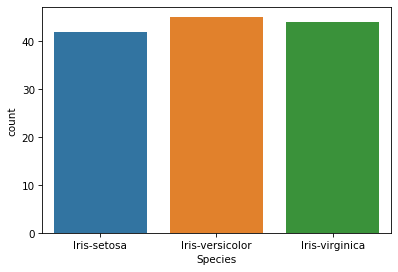

In [52]:
plt.figure(figsize=(6,4),dpi=75)
sns.countplot(data=df_clean, x='Species');

In [53]:
df_clean['Species'].value_counts()

Iris-versicolor    45
Iris-virginica     44
Iris-setosa        42
Name: Species, dtype: int64

Data set memiliki balance target (memiliki jumlah target yang hampir sama)

---

## **D. Features Correlation**

Plot korelasi antar feature

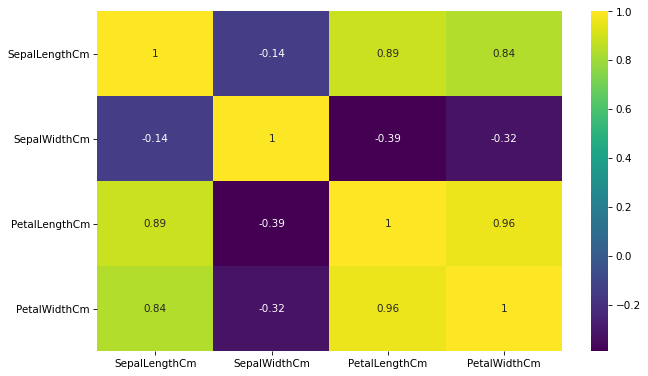

In [54]:
plt.figure(figsize=(10,6),dpi=75)
sns.heatmap(np.round(df_clean.corr(),2), annot=True, cmap='viridis')
plt.yticks(rotation=0);

Berdasarkan grafik korelasi diatas, Sepal Width memiliki korelasi negatif (jika Sepal Width semakin besar maka 3 feature lainnya semakin kecil dan sebaliknya) terhadap ketiga feature lainnya.

Sedangkan 3 feature lainnya memilki korelasi positif satu sama lain.

---

## **E. Features Relationship**

Plot hubungan dan distribusi tiap feature

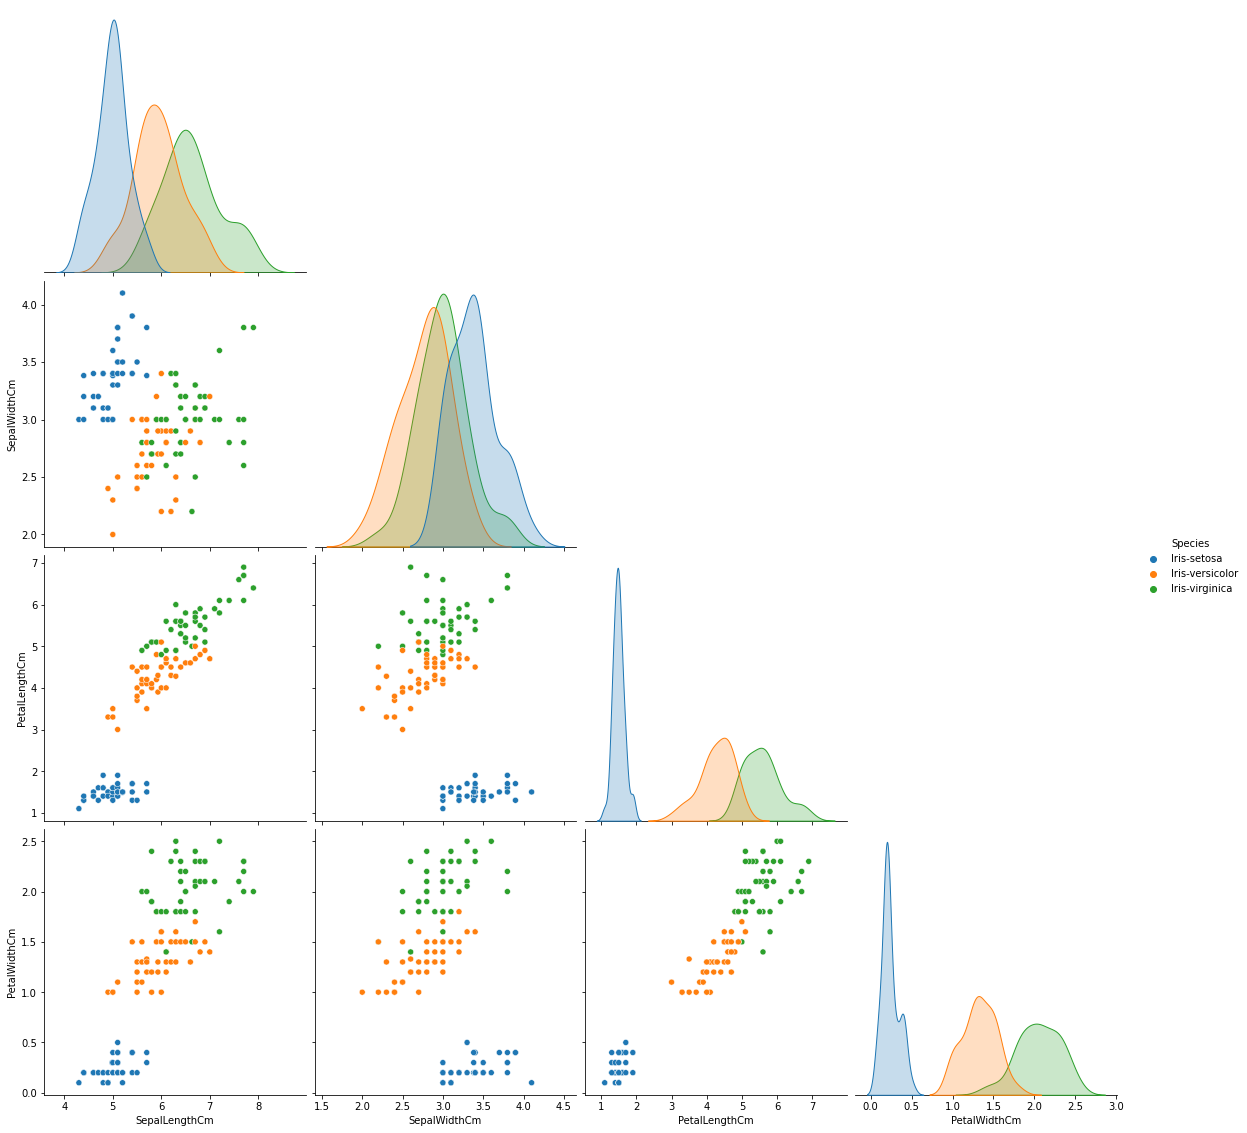

In [55]:
sns.pairplot(df_clean, hue='Species', corner=True, height=4);

Berdasarkan grafik diatas, feature pada Iris mudah untuk dipisahkan (memili separasi yang jelas) dan semua feature cenderung memilki distribusi normal meskipun beberapa spesies ada yang skew.

Mari kita zoom salah satu feature yang mudah diamati

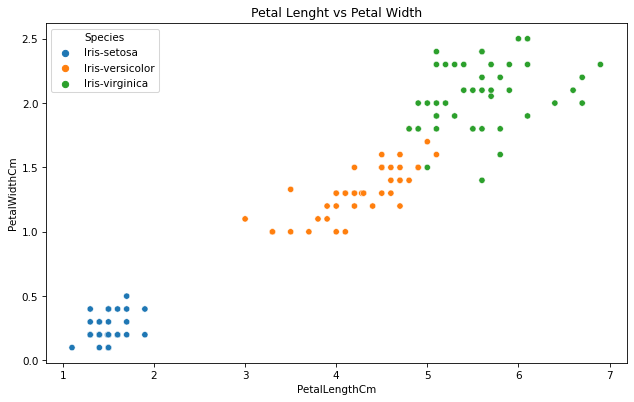

In [56]:
plt.figure(figsize=(10,6),dpi=75)
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df_clean, hue='Species')
plt.title('Petal Lenght vs Petal Width');

Berdasarkan grafik Petal Length vs Petal Width, kita dapat dengan mudah mengenali tiap spesiesnya.

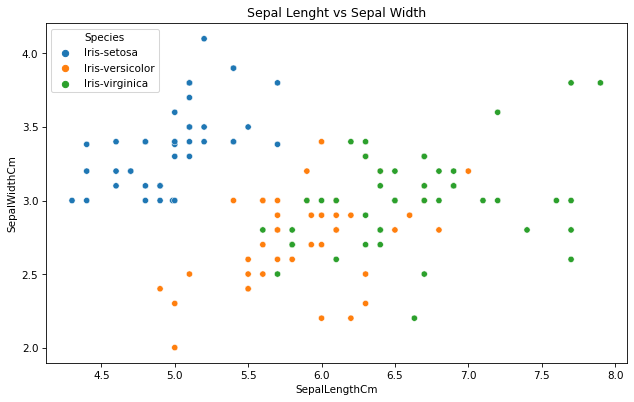

In [57]:
plt.figure(figsize=(10,6),dpi=75)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df_clean, hue='Species')
plt.title('Sepal Lenght vs Sepal Width');

Untuk feature Sepal Length dan Sepal Width cukup susah untuk dikenali tetapi tetap bisa dipisahkan dengan cara mentransformasi ke dimensi yang lebih tinggi misalnya 3D dimension.

## **F. Features Distribution**

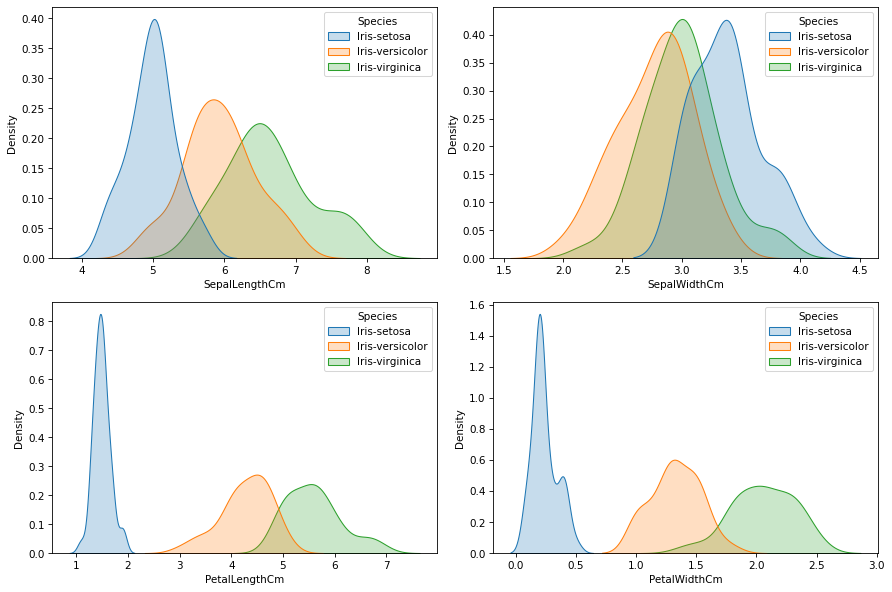

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(12,8), dpi=75)

col = 0
for i in range(2): # row of graphic
  for j in range(2): # column of graphic
    sns.kdeplot(x=df_clean.drop('Species',axis=1).columns[col], 
                data=df_copy, 
                ax=axes[i, j], 
                hue='Species', 
                shade=True)
    plt.tight_layout()
    col +=1;

* Distribusi feature pada tiap species mendekati distribusi normal
* Sepal length versicolor dan virginica sedikt skew to the right (positive skew)
* Sepal width setosa sedkit skew to the right
* Petal length setosa memiliki slope yang ekstrim dan kedua spesies lainnya sedikit skew to the right
* Petal width versicolor sedikit skew to the right dan virginia sedikit skew to the left

---
---

# **3 - Machine Learning Model**

## **A. Setup**

### **a. Train | Test Split**

Kita split data agar model dapat meng-evaluasi secara fair dan menghindari overfitting

In [59]:
X = df_clean.drop('Species',axis=1)
y = df_clean['Species']

In [60]:
from sklearn.model_selection import train_test_split

Split dengan rasio test size sebesar 30% dari keseluruhan data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [62]:
X_train.shape

(98, 4)

In [63]:
X_test.shape

(33, 4)

---

### **b. Standardization**

Scale data agar memiliki mean = 0 dan standard deviasi = 1

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

Fit dan Transform hanya pada training data untuk menghindari data leakage ke test data

In [66]:
scaled_X_train = scaler.fit_transform(X_train)

In [67]:
scaled_X_test = scaler.transform(X_test)

---

## **B. Base Model Comparison**

Kita cari model yang memiliki score tertinggi berdasarkan cross validation

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [69]:
model_list = [('Log_Reg', LogisticRegression()), 
              ('KNN', KNeighborsClassifier()), 
              ('SVC', SVC()), 
              ('DT', DecisionTreeClassifier()), 
              ('RF', RandomForestClassifier()), 
              ('AB', AdaBoostClassifier())]

In [70]:
from sklearn.model_selection import cross_val_score

for name, model in model_list:
  scores = cross_val_score(model, scaled_X_train, y_train,
                           scoring='accuracy', cv=5)
  print(f'{name:<7}: {scores.mean():.5f}')

Log_Reg: 0.94789
KNN    : 0.93789
SVC    : 0.93789
DT     : 0.93842
RF     : 0.92789
AB     : 0.92789


Logistic Regression memilki score tertinggi, coba kita gunakan model tersebut sebagai model kita

---

## **C. Logistic Regression with GridSearch**

Deklarasi Logistic model

In [71]:
log_reg = LogisticRegression(solver='saga', max_iter=5000)

Gunakan Grid Search untuk mencari parameter terbaik untuk SVC

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
# Penalty Type (Regularization)
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20) # for elastic net

'''
np.logspace -> Return numbers spaced evenly on a log scale.
Use logarithmically spaced C values (recommended in official docs)
Smaller values specify stronger regularization
'''
#C = np.logspace(0, 4, 10) # 10^0 to 10^4
C = [0.01, 0.1, 1, 5, 10]
param_grid = {'penalty':penalty,
              'l1_ratio':l1_ratio,
              'C':C
              }

In [74]:
grid_log_model = GridSearchCV(log_reg,
                              param_grid,
                              cv=5)

---

### **a. Train Model**

In [75]:
grid_log_model.fit(scaled_X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (p

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 5, 10],
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.    

---

### **b. Model Best Parameters**

In [76]:
grid_log_model.best_params_

{'C': 1, 'l1_ratio': 0.47368421052631576, 'penalty': 'elasticnet'}

---

### **c. Performance Evaluation**

Dengan menggunakan Test Data (Hold-out data), mari kita evaluasi model kita

In [77]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [78]:
y_pred = grid_log_model.predict(scaled_X_test)

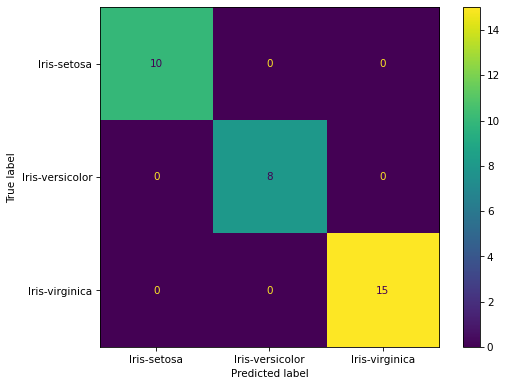

In [79]:
fig, ax = plt.subplots(figsize=(8,6), dpi=75)
plot_confusion_matrix(grid_log_model, scaled_X_test, y_test, ax=ax, values_format='d')
plt.show()

Tiap spesies dapat diprediksi dengan tepat

In [80]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        33
      macro avg       1.00      1.00      1.00        33
   weighted avg       1.00      1.00      1.00        33



Model memiliki performa yang baik dengan precision, recall dan f1 score bernilai 1

---
---

# **4 - Finalizing Model**

Buat pipeline untuk model dengan menggunakan best parameter dari GridSearch

In [81]:
scaler = StandardScaler()

In [82]:
log_reg = LogisticRegression(solver='saga', max_iter=5000, C= 1.0, l1_ratio= 0.47368421052631576, penalty= 'elasticnet')

---

## **A. Using Pipeline**

Gunakan pipeline untuk mempermudah penggunaan model

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
log_pipe = Pipeline([('scaler', scaler), 
                     ('log_reg', log_reg)])

In [85]:
log_pipe.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=0.47368421052631576, max_iter=5000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='elasticnet', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

---

## **B. Prediction on New Data**
Gunakan model yang telah kita buat untuk memprediksi data baru (tidak pernah dilihat oleh model)

Read data baru dari Data iris submission.csv

In [86]:
col_list = X.columns
new_data = pd.read_csv('/content/drive/MyDrive/Data_Science/Dataset/Iris/Data_iris_submission.csv', 
                       sep=';', 
                       usecols=col_list)
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.6,3.6,1.0,0.2
1,5.0,3.2,1.2,0.2
2,5.8,4.0,1.2,0.2
3,5.3,3.7,1.5,0.2
4,5.4,3.7,1.5,0.2
5,5.6,2.9,3.6,1.3
6,5.5,2.3,4.0,1.3
7,5.2,2.7,3.9,1.4
8,6.6,3.0,4.4,1.4
9,6.7,3.1,4.4,1.4


Hasil prediksi model pada data baru

In [87]:
prediction = log_pipe.predict(np.array(new_data))
pd.Series(prediction)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5     Iris-versicolor
6     Iris-versicolor
7     Iris-versicolor
8     Iris-versicolor
9     Iris-versicolor
10     Iris-virginica
11     Iris-virginica
12     Iris-virginica
13    Iris-versicolor
14     Iris-virginica
dtype: object

---
---